In [354]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import json

In [365]:
chroms = [str(x) for x in range(1, 23)]
deletion_dir = '../deletions_ihart_asym'

In [366]:
# From GRCh37.p13 https://www.ncbi.nlm.nih.gov/grc/human/data?asm=GRCh37.p13
chrom_lengths = {
	'1': 249250621,
	'2': 243199373,
	'3': 198022430,
	'4': 191154276,
	'5': 180915260,
	'6': 171115067,
	'7': 159138663,
	'8': 146364022,
	'9': 141213431,
	'10': 135534747,
	'11': 135006516,
	'12': 133851895,
	'13': 115169878,
	'14': 107349540,
	'15': 102531392,
	'16': 90354753,
	'17': 81195210,
	'18': 78077248,
	'19': 59128983,
	'20': 63025520,
	'21': 48129895,
	'22': 51304566,
	'X': 155270560,
	'Y': 59373566
}

chrom_offsets = [0]
for chrom in chroms:
    chrom_offsets.append(chrom_offsets[-1]+chrom_lengths[chrom])
print(chrom_offsets)

[0, 249250621, 492449994, 690472424, 881626700, 1062541960, 1233657027, 1392795690, 1539159712, 1680373143, 1815907890, 1950914406, 2084766301, 2199936179, 2307285719, 2409817111, 2500171864, 2581367074, 2659444322, 2718573305, 2781598825, 2829728720, 2881033286]


# Filter collections

In [367]:
all_indices = []
all_collections = []
for chrom in chroms:
    with open('%s/chr.%s.collections.json' % (deletion_dir, chrom), 'r') as f:
        collections = json.load(f)
        all_collections.append(collections)
    
    indices = np.ones((len(collections),), dtype=bool)
        
    print(np.sum(indices), indices.shape[0])
    all_indices.append(indices)
        

10987 10987
11615 11615
7174 7174
9612 9612
7493 7493
7798 7798
9247 9247
8216 8216
8905 8905
6366 6366
7002 7002
5247 5247
4227 4227
11188 11188
5430 5430
4733 4733
4470 4470
3238 3238
5649 5649
2341 2341
1993 1993
3508 3508


In [368]:
all_positions = [np.load('%s/chr.%s.positions.npy' % (deletion_dir, chrom)) for chrom in chroms]
stacked_start_pos = np.vstack([x+chrom_offsets[i] for i, x in enumerate(all_positions)])[:, 0]
stacked_start_pos_filtered = np.vstack([x[all_indices[i]]+chrom_offsets[i] for i, x in enumerate(all_positions)])[:, 0]
print(stacked_start_pos)


[     51859      54353      55216 ... 2880848523 2880848546 2880848561]


# Transmission Rates

In [369]:
all_transrates = [np.load('%s/chr.%s.transrates.npz' % (deletion_dir, chrom)) for chrom in chroms]

stacked_transrates_aff = np.hstack([x['aff'] for x in all_transrates])
stacked_transrates_unaff = np.hstack([x['unaff'] for x in all_transrates])
stacked_transrates_aff_m = np.hstack([x['aff_m'] for x in all_transrates])
stacked_transrates_unaff_m = np.hstack([x['unaff_m'] for x in all_transrates])
stacked_transrates_aff_f = np.hstack([x['aff_f'] for x in all_transrates])
stacked_transrates_unaff_f = np.hstack([x['unaff_f'] for x in all_transrates])
stacked_transrates_aff_mat = np.hstack([x['aff_mat'] for x in all_transrates])
stacked_transrates_unaff_mat = np.hstack([x['unaff_mat'] for x in all_transrates])
stacked_transrates_aff_pat = np.hstack([x['aff_pat'] for x in all_transrates])
stacked_transrates_unaff_pat = np.hstack([x['unaff_pat'] for x in all_transrates])

stacked_transrates_filtered_aff = np.hstack([x['aff'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_unaff = np.hstack([x['unaff'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_aff_m = np.hstack([x['aff_m'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_unaff_m = np.hstack([x['unaff_m'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_aff_f = np.hstack([x['aff_f'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_unaff_f = np.hstack([x['unaff_f'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_aff_mat = np.hstack([x['aff_mat'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_unaff_mat = np.hstack([x['unaff_mat'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_aff_pat = np.hstack([x['aff_pat'][indices] for x, indices in zip(all_transrates, all_indices)])
stacked_transrates_filtered_unaff_pat = np.hstack([x['unaff_pat'][indices] for x, indices in zip(all_transrates, all_indices)])


All Affected Unaffected 0.5134260742388593 0.49749787752513813
Males Affected Unaffected 0.5081189558947022 0.4905648785353476
Females Affected Unaffected 0.511395032246965 0.4967056939922951
Maternal Affected Unaffected 0.5076065448223483 0.496318162798576
Paternal Affected Unaffected 0.5071548617524764 0.49035763387171105
Affected Males Females 0.5081189558947022 0.511395032246965
Unaffected Males Females 0.4905648785353476 0.4967056939922951
Affected Maternal Paternal 0.5076065448223483 0.5071548617524764
Unaffected Maternal Paternal 0.496318162798576 0.49035763387171105


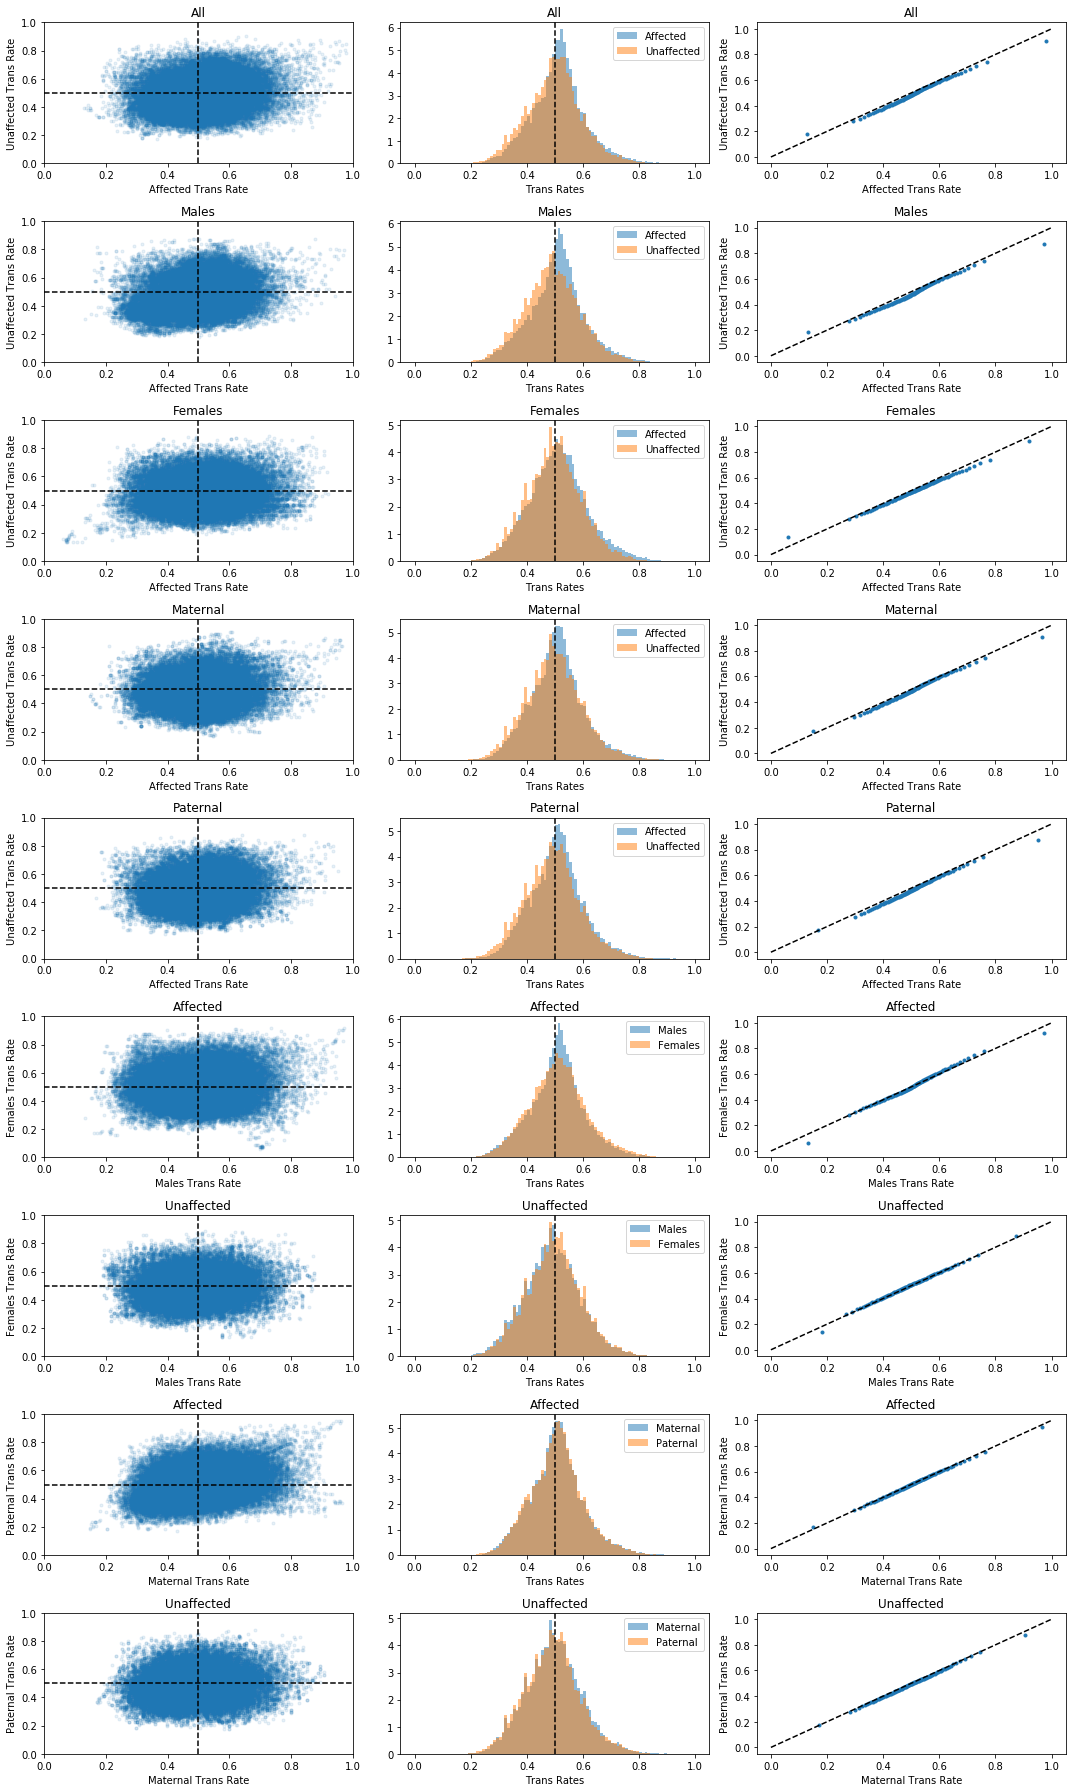

In [422]:
plt.figure(figsize=(15, 25))

to_plot = [
    ('All', 'Affected', 'Unaffected', stacked_transrates_filtered_aff, stacked_transrates_filtered_unaff),
    ('Males', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_m, stacked_transrates_filtered_unaff_m),
    ('Females', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_f, stacked_transrates_filtered_unaff_f),
    ('Maternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_mat, stacked_transrates_filtered_unaff_mat),
    ('Paternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_pat, stacked_transrates_filtered_unaff_pat),
    ('Affected', 'Males', 'Females', stacked_transrates_filtered_aff_m, stacked_transrates_filtered_aff_f),
    ('Unaffected', 'Males', 'Females', stacked_transrates_filtered_unaff_m, stacked_transrates_filtered_unaff_f),
    ('Affected', 'Maternal', 'Paternal', stacked_transrates_filtered_aff_mat, stacked_transrates_filtered_aff_pat),
    ('Unaffected', 'Maternal', 'Paternal', stacked_transrates_filtered_unaff_mat, stacked_transrates_filtered_unaff_pat)
]

for i, (title, label1, label2, transrates1, transrates2) in enumerate(to_plot):
    
    # Scatter
    plt.subplot(len(to_plot), 3, 3*i + 1)
    plt.scatter(transrates1, transrates2, alpha=0.1, marker='.')
    plt.xlabel('%s Trans Rate' % label1)
    plt.ylabel('%s Trans Rate' % label2)
    plt.axhline(0.5, color='black', linestyle='--')
    plt.axvline(0.5, color='black', linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(title)

    # Hist
    bins = np.arange(0, 1.01, 0.01)

    plt.subplot(len(to_plot), 3, 3*i + 2)
    plt.hist(transrates1, bins=bins, alpha=0.5, density=True, label=label1) 
    plt.hist(transrates2, bins=bins, alpha=0.5, density=True, label=label2)
    print(title, label1, label2, np.nanmean(transrates1), np.nanmean(transrates2))
    plt.title(title)
    plt.xlabel('Trans Rates')
    plt.legend()
    plt.axvline(0.5, color='black', linestyle='--')

    # QQ plot
    plt.subplot(len(to_plot), 3, 3*i + 3)
    plt.scatter(np.nanquantile(transrates1, bins), 
                np.nanquantile(transrates2, bins), marker='.')
    plt.title(title)
    plt.xlabel('%s Trans Rate' % label1)
    plt.ylabel('%s Trans Rate' % label2)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.tight_layout()
plt.show()

# Posterior pvalues

In [371]:
all_posterior_pvalues = [np.load('%s/chr.%s.posterior_pvalues.npz' % (deletion_dir, chrom)) for chrom in chroms]

stacked_posterior_pvalues_aff = np.vstack([x['aff'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff = np.vstack([x['unaff'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_aff_m = np.vstack([x['aff_m'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff_m = np.vstack([x['unaff_m'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_aff_f = np.vstack([x['aff_f'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff_f = np.vstack([x['unaff_f'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_aff_mat = np.vstack([x['aff_mat'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff_mat = np.vstack([x['unaff_mat'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_aff_pat = np.vstack([x['aff_pat'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff_pat = np.vstack([x['unaff_pat'] for x in all_posterior_pvalues])

stacked_posterior_pvalues_filtered_aff = np.vstack([x['aff'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_unaff = np.vstack([x['unaff'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_aff_m = np.vstack([x['aff_m'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_unaff_m = np.vstack([x['unaff_m'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_aff_f = np.vstack([x['aff_f'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_unaff_f = np.vstack([x['unaff_f'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_aff_mat = np.vstack([x['aff_mat'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_unaff_mat = np.vstack([x['unaff_mat'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_aff_pat = np.vstack([x['aff_pat'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])
stacked_posterior_pvalues_filtered_unaff_pat = np.vstack([x['unaff_pat'][all_indices[i], :] for i, x in enumerate(all_posterior_pvalues)])



//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


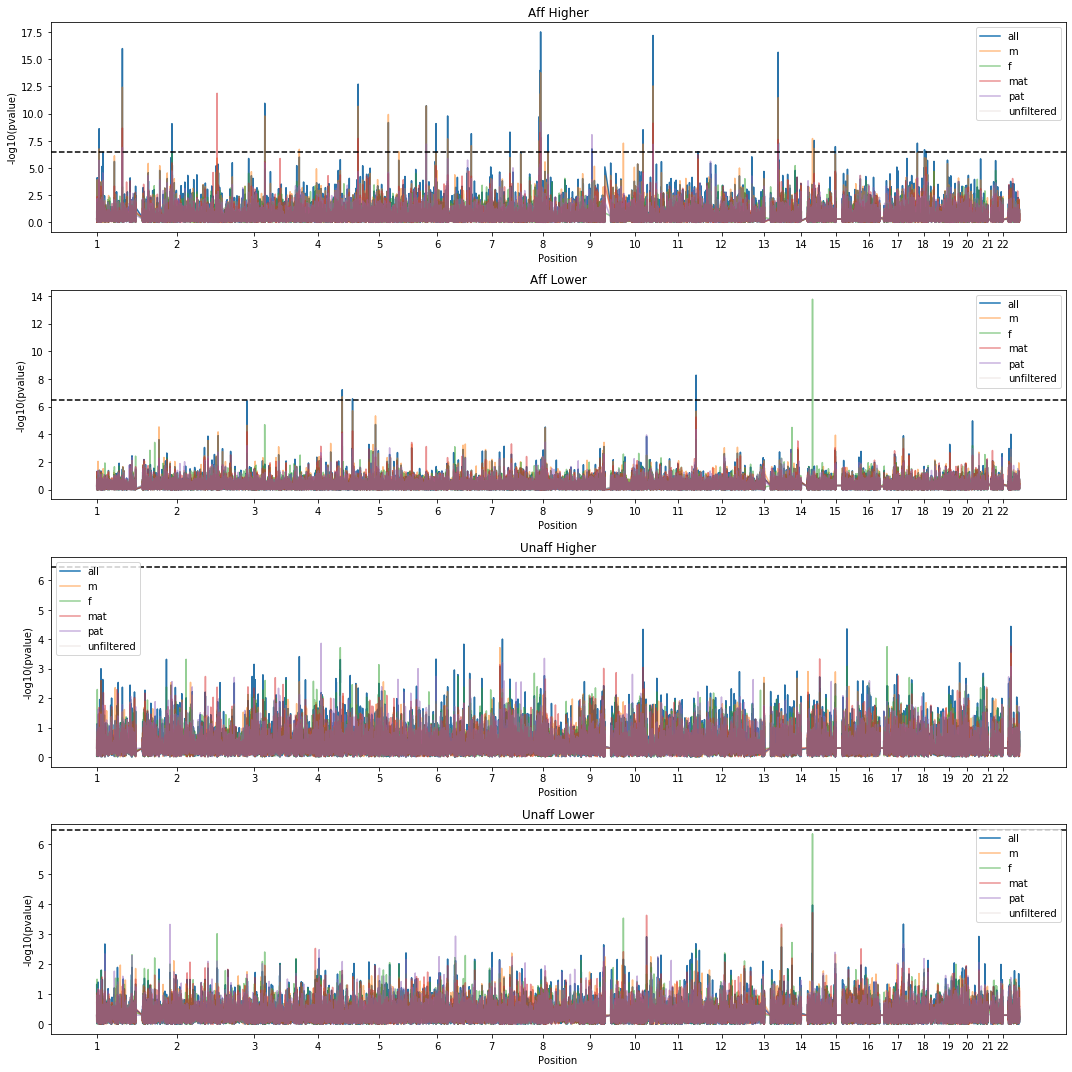

In [372]:
plt.figure(figsize=(15, 15))

cutoff = -np.log10(0.05/stacked_start_pos_filtered.shape[0])

plt.subplot(4, 1, 1)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff[:, 0]), label='all')
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_m[:, 0]), label='m', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_f[:, 0]), label='f', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_mat[:, 0]), label='mat', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_pat[:, 0]), label='pat', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff[:, 0]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Aff Higher')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff[:, 1]), label='all')
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_m[:, 1]), label='m', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_f[:, 1]), label='f', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_mat[:, 1]), label='mat', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_pat[:, 1]), label='pat', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff[:, 1]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Aff Lower')
plt.legend()  

plt.subplot(4, 1, 3)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff[:, 0]), label='all')
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_m[:, 0]), label='m', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_f[:, 0]), label='f', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_mat[:, 0]), label='mat', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_pat[:, 0]), label='pat', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff[:, 0]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Unaff Higher')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff[:, 1]), label='all')
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_m[:, 1]), label='m', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_f[:, 1]), label='f', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_mat[:, 1]), label='mat', alpha=0.5)
plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_pat[:, 1]), label='pat', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff[:, 1]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Unaff Lower')
plt.legend()

plt.tight_layout()
plt.show()

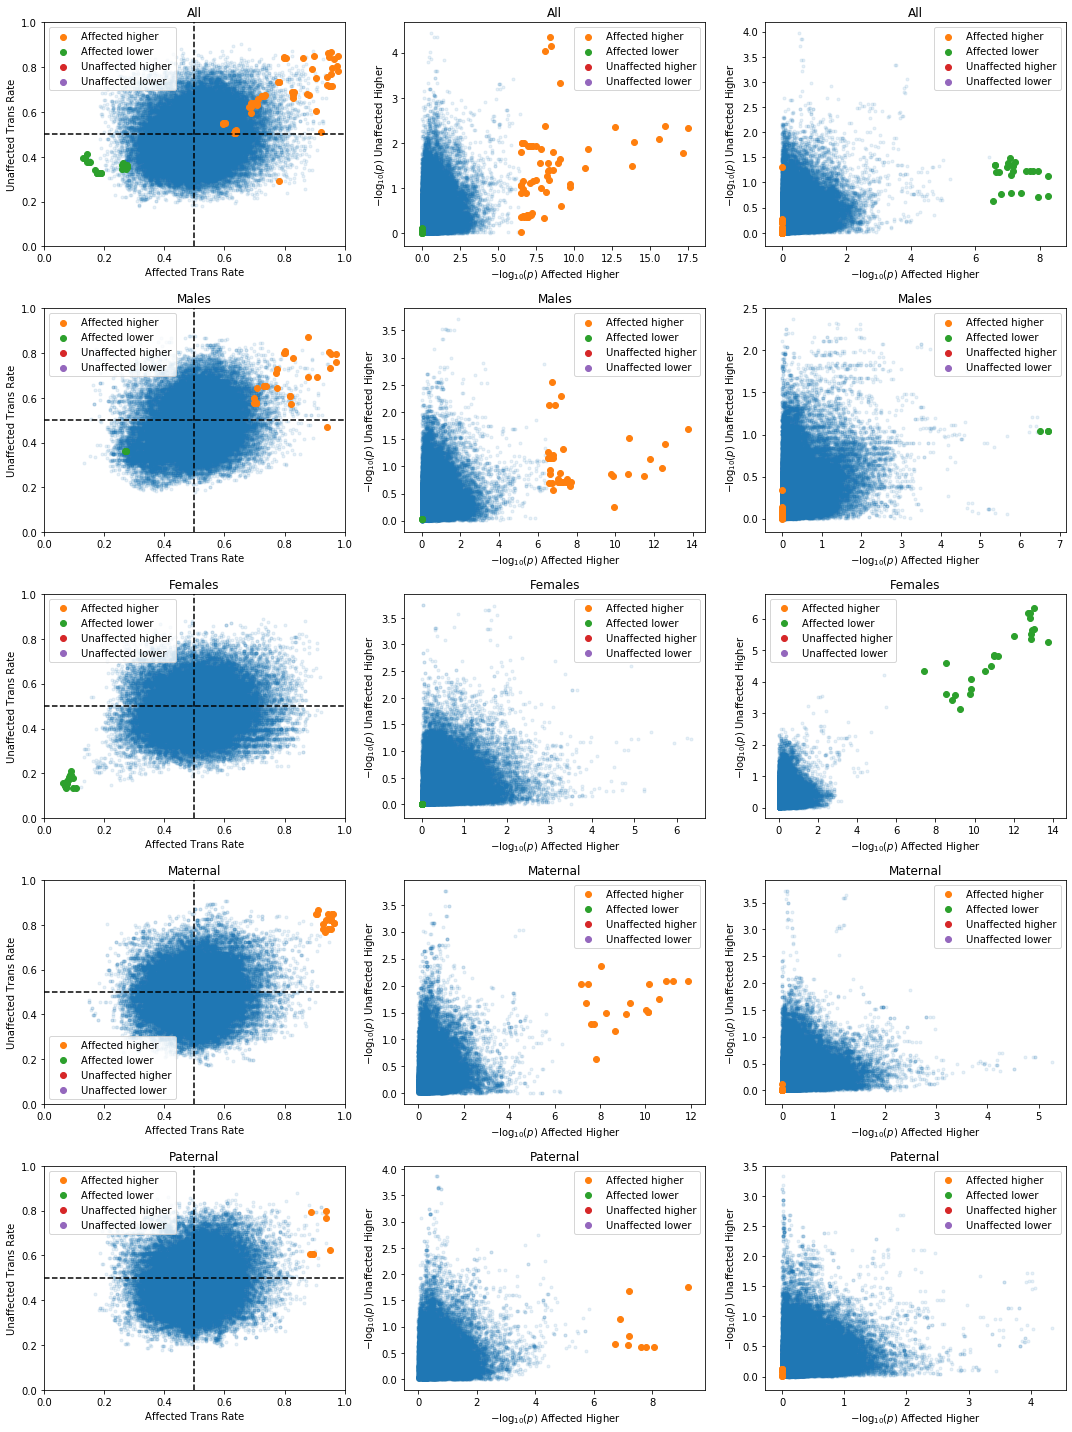

In [373]:
plt.figure(figsize=(15, 20))

to_plot = [
    ('All', 'Affected', 'Unaffected', stacked_transrates_filtered_aff, stacked_transrates_filtered_unaff, stacked_posterior_pvalues_filtered_aff, stacked_posterior_pvalues_filtered_unaff),
    ('Males', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_m, stacked_transrates_filtered_unaff_m, stacked_posterior_pvalues_filtered_aff_m, stacked_posterior_pvalues_filtered_unaff_m),
    ('Females', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_f, stacked_transrates_filtered_unaff_f, stacked_posterior_pvalues_filtered_aff_f, stacked_posterior_pvalues_filtered_unaff_f),
    ('Maternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_mat, stacked_transrates_filtered_unaff_mat, stacked_posterior_pvalues_filtered_aff_mat, stacked_posterior_pvalues_filtered_unaff_mat),
    ('Paternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_pat, stacked_transrates_filtered_unaff_pat, stacked_posterior_pvalues_filtered_aff_pat, stacked_posterior_pvalues_filtered_unaff_pat),
]

for i, (title, label1, label2, transrates1, transrates2, pvalues1, pvalues2) in enumerate(to_plot):
    
    indices = -np.log10(pvalues1)>=cutoff
    higher_indices1 = indices[:, 0]
    lower_indices1 = indices[:, 1]
    indices = -np.log10(pvalues2)>=cutoff
    higher_indices2 = indices[:, 0]
    lower_indices2 = indices[:, 1]
    
    # Transrate plot
    plt.subplot(len(to_plot), 3, 3*i + 1)
    plt.scatter(transrates1, transrates2, alpha=0.1, marker='.')

    plt.scatter(transrates1[higher_indices1], transrates2[higher_indices1], label='%s higher' % label1)
    plt.scatter(transrates1[lower_indices1], transrates2[lower_indices1], label='%s lower' % label1)
    plt.scatter(transrates1[higher_indices2], transrates2[higher_indices2], label='%s higher' % label2)
    plt.scatter(transrates1[lower_indices2], transrates2[lower_indices2], label='%s lower' % label2)
    
    plt.xlabel('%s Trans Rate' % label1)
    plt.ylabel('%s Trans Rate' % label2)
    plt.axhline(0.5, color='black', linestyle='--')
    plt.axvline(0.5, color='black', linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(title)
    plt.legend()

    # Pvalue plot1
    plt.subplot(len(to_plot), 3, 3*i+2)
    p1, p2 = -np.log10(pvalues1)[:, 0], -np.log10(pvalues2)[:, 0]
    plt.scatter(p1, p2, alpha=0.1, marker='.')

    plt.scatter(p1[higher_indices1], p2[higher_indices1], label='%s higher' % label1)
    plt.scatter(p1[lower_indices1], p2[lower_indices1], label='%s lower' % label1)
    plt.scatter(p1[higher_indices2], p2[higher_indices2], label='%s higher' % label2)
    plt.scatter(p1[lower_indices2], p2[lower_indices2], label='%s lower' % label2)

    plt.xlabel('$-\log_{10}(p)$ %s Higher' % label1)
    plt.ylabel('$-\log_{10}(p)$ %s Higher' % label2)
    plt.title(title)
    plt.legend()

    # Pvalue plot2
    plt.subplot(len(to_plot), 3, 3*i+3)
    p1, p2 = -np.log10(pvalues1)[:, 1], -np.log10(pvalues2)[:, 1]
    plt.scatter(p1, p2, alpha=0.1, marker='.')

    plt.scatter(p1[higher_indices1], p2[higher_indices1], label='%s higher' % label1)
    plt.scatter(p1[lower_indices1], p2[lower_indices1], label='%s lower' % label1)
    plt.scatter(p1[higher_indices2], p2[higher_indices2], label='%s higher' % label2)
    plt.scatter(p1[lower_indices2], p2[lower_indices2], label='%s lower' % label2)

    plt.xlabel('$-\log_{10}(p)$ %s Higher' % label1)
    plt.ylabel('$-\log_{10}(p)$ %s Higher' % label2)
    plt.title(title)
    plt.legend()


plt.tight_layout()
plt.show()

In [416]:
import statsmodels.api as sm

all_contingency = [np.load('%s/chr.%s.contingency.npz' % (deletion_dir, chrom)) for chrom in chroms]

def printout_hits(posterior_pvalues, collections, indices, contingency_aff, contingency_unaff, label):
    
    if indices is None:
        indices = np.ones((posterior_pvalues.shape[0],), dtype=bool)
            
    for j in np.where((-np.log10(posterior_pvalues[:, 0]) > cutoff) & indices)[0]:
        d = collections[j]['deletion']
        aff_trans = np.sum(contingency_aff[j, :, 1])
        aff_notrans = np.sum(contingency_aff[j, :, 0])
        unaff_trans = np.sum(contingency_unaff[j, :, 1])
        unaff_notrans = np.sum(contingency_unaff[j, :, 0])
        aff_n = aff_trans+aff_notrans
        unaff_n = unaff_trans+unaff_notrans
        
        table = sm.stats.Table2x2(np.array([[aff_trans, unaff_trans], [aff_notrans, unaff_notrans]]))

        print('%s%s:%d-%d\t%d\tp=%0.2f\tor=%0.3f(%0.3f,%0.3f)\trr=%0.3f(%0.3f,%0.3f)\tan=%d\tun=%d\t%s' % ('*' if indices[j] else '',
                    d['chrom'], d['start_pos'], d['end_pos'], d['length'],
                    -np.log10(posterior_pvalues[j, 0]), 
                    table.oddsratio, table.oddsratio_confint()[0], table.oddsratio_confint()[1], 
                    table.riskratio, table.riskratio_confint()[0], table.riskratio_confint()[1], 
                    aff_n, unaff_n, 'higher'))
        
    for j in np.where((-np.log10(posterior_pvalues[:, 1]) > cutoff) & indices)[0]:
        d = collections[j]['deletion']
        aff_trans = np.sum(contingency_aff[j, :, 1])
        aff_notrans = np.sum(contingency_aff[j, :, 0])
        unaff_trans = np.sum(contingency_unaff[j, :, 1])
        unaff_notrans = np.sum(contingency_unaff[j, :, 0])
        aff_n = aff_trans+aff_notrans
        unaff_n = unaff_trans+unaff_notrans
        
        table = sm.stats.Table2x2(np.array([[aff_trans, unaff_trans], [aff_notrans, unaff_notrans]]))

        print('%s%s:%d-%d\t%d\tp=%0.2f\tor=%0.3f(%0.3f,%0.3f)\trr=%0.3f(%0.3f,%0.3f)\tan=%d\tun=%d\t%s' % ('*' if indices[j] else '',
                    d['chrom'], d['start_pos'], d['end_pos'], d['length'],
                    -np.log10(posterior_pvalues[j, 1]), 
                    table.oddsratio, table.oddsratio_confint()[0], table.oddsratio_confint()[1], 
                    table.riskratio, table.riskratio_confint()[0], table.riskratio_confint()[1], 
                    aff_n, unaff_n, 'lower'))

for i, chrom in enumerate(chroms):
    printout_hits(all_posterior_pvalues[i]['aff'], all_collections[i], all_indices[i], all_contingency[i]['aff'], all_contingency[i]['unaff'], 'aff-all')
    #printout_hits(all_posterior_pvalues[i]['unaff'], all_collections[i], all_indices[i], all_contingency[i]['aff'], all_contingency[i]['unaff'], 'unaff-all')
    #printout_hits(all_posterior_pvalues[i]['aff_m'], all_collections[i], all_indices[i], all_contingency[i]['aff_m'], all_contingency[i]['unaff_m'], 'aff-m')
    #printout_hits(all_posterior_pvalues[i]['unaff_m'], all_collections[i], all_indices[i], all_contingency[i]['aff_m'], all_contingency[i]['unaff_m'], 'unaff-m')
    #printout_hits(all_posterior_pvalues[i]['aff_f'], all_collections[i], all_indices[i], all_contingency[i]['aff_f'], all_contingency[i]['unaff_f'], 'aff-f')
    #printout_hits(all_posterior_pvalues[i]['unaff_f'], all_collections[i], all_indices[i], all_contingency[i]['aff_f'], all_contingency[i]['unaff_f'], 'unaff-f')
    #printout_hits(all_posterior_pvalues[i]['aff_mat'], all_collections[i], all_indices[i], all_contingency[i]['aff_mat'], all_contingency[i]['unaff_mat'], 'aff-mat')
    #printout_hits(all_posterior_pvalues[i]['unaff_mat'], all_collections[i], all_indices[i], all_contingency[i]['aff_mat'], all_contingency[i]['unaff_mat'], 'unaff-mat')
    #printout_hits(all_posterior_pvalues[i]['aff_pat'], all_collections[i], all_indices[i], all_contingency[i]['aff_pat'], all_contingency[i]['unaff_pat'], 'aff-pat')
    #printout_hits(all_posterior_pvalues[i]['unaff_pat'], all_collections[i], all_indices[i], all_contingency[i]['aff_pat'], all_contingency[i]['unaff_pat'], 'unaff-pat')



*1:7558820-7558867	48	p=8.27	or=2.044(0.800,5.226)	rr=1.187(0.908,1.551)	an=133	un=33	higher
*1:7558820-7558835	16	p=8.40	or=2.168(0.882,5.330)	rr=1.209(0.927,1.578)	an=138	un=35	higher
*1:7558820-7558842	23	p=8.35	or=1.911(0.755,4.837)	rr=1.164(0.901,1.505)	an=137	un=34	higher
*1:7558820-7558849	30	p=8.61	or=2.000(0.785,5.094)	rr=1.182(0.904,1.545)	an=135	un=34	higher
*1:80221775-80223093	1319	p=15.98	or=1.631(0.078,34.232)	rr=1.058(0.688,1.628)	an=140	un=14	higher
*1:234973876-234973979	104	p=8.94	or=1.457(0.894,2.377)	rr=1.073(0.972,1.184)	an=448	un=94	higher
*1:234973876-234973933	58	p=8.66	or=1.384(0.871,2.201)	rr=1.062(0.969,1.164)	an=499	un=105	higher
*1:234973876-234973964	89	p=9.07	or=1.433(0.880,2.333)	rr=1.069(0.970,1.178)	an=456	un=95	higher
*1:234973876-234973930	55	p=7.83	or=1.334(0.845,2.105)	rr=1.055(0.965,1.153)	an=508	un=108	higher
*1:234973876-234973917	42	p=7.75	or=1.393(0.894,2.168)	rr=1.064(0.974,1.162)	an=524	un=112	higher
*1:234973877-234973918	42	p=8.27	or=1.42

In [173]:
def printout_hits(cutoff, posterior_pvalues_aff, posterior_pvalues_unaff, indices=None):
    if indices is None:
        indices = [np.ones((posterior_pvalues_aff[i].shape[0],), dtype=bool) for i in range(len(chroms))]
            
    print('Higher')
    for i, chrom in enumerate(chroms):
        print(chrom)
        
        for j in np.where((-np.log10(posterior_pvalues_aff[i][:, 0]) > cutoff) & (-np.log10(posterior_pvalues_unaff[i][:, 0]) <= 3) & indices[i])[0]:
            d = all_collections[i][j].deletion
            #if d.length>100:
            print('%s%s:%d-%d %d %d %0.2f/%0.2f/%0.2f/%0.2f' % ('*' if ind_indices[i][j] else '', 
                                           d.chrom, d.opt_start_pos, d.opt_end_pos, d.length, j,
                                              -np.log10(posterior_pvalues_aff[i][j, 0]),
                                              -np.log10(posterior_pvalues_aff[i][j, 1]),
                                              -np.log10(posterior_pvalues_unaff[i][j, 0]),
                                              -np.log10(posterior_pvalues_unaff[i][j, 1])))
                
    print('Lower')
    for i, chrom in enumerate(chroms):
        print(chrom)
        for j in np.where((-np.log10(posterior_pvalues_aff[i][:, 1]) > cutoff) & (-np.log10(posterior_pvalues_unaff[i][:, 1]) <= 3) & indices[i])[0]:
            d = all_collections[i][j].deletion
            #if d.length>100:
            print('%s%s:%d-%d %d %d %0.2f/%0.2f/%0.2f/%0.2f' % ('*' if ind_indices[i][j] else '', 
                                           d.chrom, d.opt_start_pos, d.opt_end_pos, d.length, j,
                                              -np.log10(posterior_pvalues_aff[i][j, 0]),
                                              -np.log10(posterior_pvalues_aff[i][j, 1]),
                                              -np.log10(posterior_pvalues_unaff[i][j, 0]),
                                              -np.log10(posterior_pvalues_unaff[i][j, 1])))

cutoff = -np.log10(0.05/sum([len(contingency_ihart_aff[i]) for i in range(len(chroms))]))
#cutoff = -np.log10(0.05/sum([np.sum(ind_indices[i]) for i in range(len(chroms))]))

print('Affected')                
printout_hits(cutoff, posterior_pvalues_ihart_aff, posterior_pvalues_ihart_unaff)#, indices=ind_indices)

print('Unaffected')                
printout_hits(cutoff, posterior_pvalues_ihart_unaff, posterior_pvalues_ihart_aff)#, indices=ind_indices)


Affected
Higher
1
1:7558820-7559756 937 1217 6.69/0.00/0.30/0.30
1:80221752-80223092 1341 5462 17.77/0.00/1.16/0.03
1:80221775-80223093 1319 5468 17.97/-0.00/1.16/0.03
2
*2:174151747-174152127 381 12755 6.91/0.00/1.10/0.04
3
*3:32203880-32204164 285 2019 10.04/0.00/1.07/0.04
*3:140138472-140138768 297 7145 8.71/0.00/1.93/0.01
4
4:69790855-69791121 177 5920 7.88/0.00/0.54/0.15
*4:125867366-125867793 428 9528 15.47/0.00/1.99/0.00
5
*5:28932654-28932889 236 2606 12.66/0.00/1.22/0.03
*5:61293645-61293993 349 4323 8.49/0.00/1.53/0.01
*5:147462150-147462581 432 9576 15.21/0.00/1.69/0.01
*5:177761428-177761436 9 11242 9.00/0.00/2.09/0.00
6
*6:33093366-33093776 411 5053 10.90/0.00/0.97/0.05
*6:95335618-95336019 402 8417 14.30/0.00/1.61/0.01
*6:107124516-107124917 402 8928 8.03/0.00/1.68/0.01
7
*7:56564072-56564255 184 4491 6.70/0.00/0.90/0.06
7:91137313-91137450 138 9508 8.15/0.00/1.79/0.01
*7:91137314-91137450 137 9510 7.15/0.00/1.79/0.01
*7:150463005-150463469 465 13425 13.38/0.00/2.03/0.00


In [165]:
lengths = []
for i, chrom in enumerate(chroms):
    lengths.extend([x.deletion.length for x in all_collections[i]])
lengths = np.array(lengths)

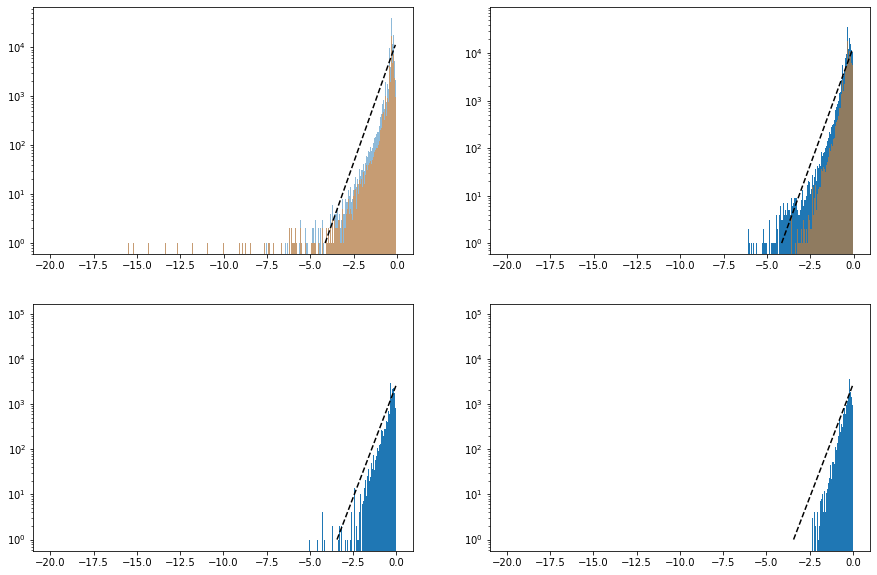

In [169]:
plt.figure(figsize=(15, 10))

aff_pvalues = np.log10(np.vstack(posterior_pvalues_ihart_aff))
bins = np.arange(-20, 0, 0.05)
theoretical = np.sum(np.hstack(ind_indices))*(np.power(10, bins[1:]) - np.power(10, bins[:-1]))

plt.subplot(2, 2, 1)
plt.hist(aff_pvalues[np.hstack(ind_indices), 0], log=True, bins=bins, alpha=0.5)
plt.hist(aff_pvalues[np.hstack(ind_indices) & (lengths<1000), 0], log=True, bins=bins, alpha=0.5)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

plt.subplot(2, 2, 2)
plt.hist(aff_pvalues[:, 1], log=True, bins=bins)
plt.hist(aff_pvalues[lengths<1000, 1], log=True, bins=bins, alpha=0.5)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

unaff_pvalues = np.log10(np.vstack(posterior_pvalues_ihart_unaff))
bins = np.arange(-20, 0, 0.01)
theoretical = np.sum(np.hstack(ind_indices))*(np.power(10, bins[1:]) - np.power(10, bins[:-1]))

plt.subplot(2, 2, 3)
plt.hist(unaff_pvalues[:, 0], log=True, bins=bins)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

plt.subplot(2, 2, 4)
plt.hist(unaff_pvalues[:, 1], log=True, bins=bins)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

plt.show()


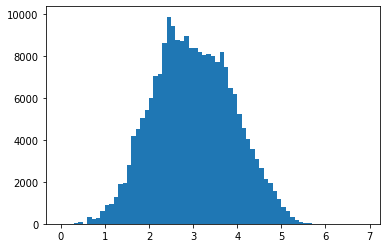

939.0 2 18264716 39.0 32874.0


In [167]:
plt.hist(np.log10(lengths), bins=np.arange(0, 7, 0.1))
plt.show()
print(np.median(lengths), np.min(lengths), np.max(lengths), np.quantile(lengths, 0.05), np.quantile(lengths, 0.95))

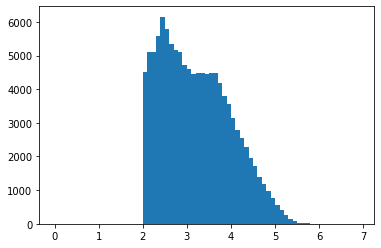

1304.0 101 3207033 133.0 40087.19999999995


In [170]:
plt.hist(np.log10(lengths[np.hstack(ind_indices)]), bins=np.arange(0, 7, 0.1))
plt.show()
print(np.median(lengths[np.hstack(ind_indices)]), 
      np.min(lengths[np.hstack(ind_indices)]), 
      np.max(lengths[np.hstack(ind_indices)]), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.05), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.95))



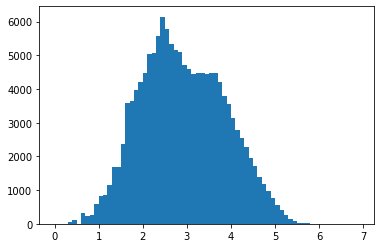

703.0 2 3207033 29.0 33669.20000000001


In [172]:
plt.hist(np.log10(lengths[np.hstack(ind_indices)]), bins=np.arange(0, 7, 0.1))
plt.show()
print(np.median(lengths[np.hstack(ind_indices)]), 
      np.min(lengths[np.hstack(ind_indices)]), 
      np.max(lengths[np.hstack(ind_indices)]), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.05), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.95))

